In [112]:
## Question 4 of the homework
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

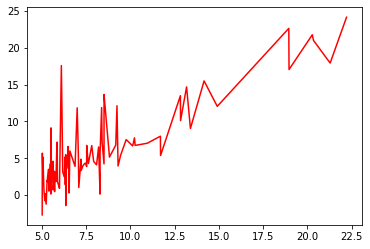

In [153]:
## 4.1) Extract data from .txt file, then sort x-y pairs based on x value
## while preserving correlation for better graphing.
pairs = []
with open ('data2.txt') as f:
    for row in f:
        pairs += [[float(row.split(',')[0]),float(row.split(',')[1])]]
f.close()
pairs.sort(key = lambda x: x[0])

X = [pair[0] for pair in pairs]
Y = [pair[1] for pair in pairs]

plt.plot(X, Y, 'r')
plt.show()

In [154]:
## 4.2) Normal equation solution for coefficients. Start by formatting
## data as np.array. Appending ones is required for bias term

X = np.array(X)
Y = np.array(Y)
X_b = np.c_[np.ones((len(X), 1)), X]

w = inv(X_b.transpose().dot(X_b)).dot(X_b.transpose()).dot(Y)
print(w)

[-3.89578088  1.19303364]


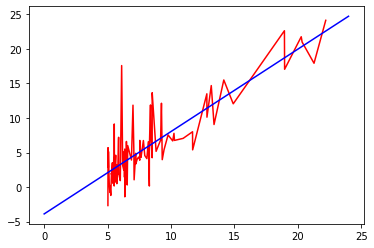

In [87]:
## Generate list of x values to calculate y from in order to visualize
## fit of model.
x_pred = np.array([i for i in range(0,25)])
x_pred_b = np.c_[np.ones((len(x_pred),1)),x_pred]
y_pred = x_pred_b.dot(w)

plt.plot(X,Y,'r', x_pred, y_pred, 'b')

(9, 9)


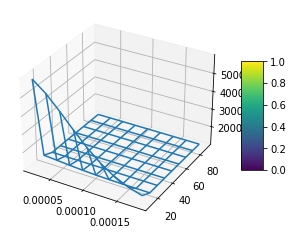

In [165]:
## 4.3) Find w using batch and stochastic descent
## Batch

Err = []
Err_rates = []
Err_ite = []

w = np.array(np.zeros((2,)))
rates = [rate/50000.0 for rate in range(1, 10)]
num_iterations = [ite*10 for ite in range(1,10)]
for ite in num_iterations:
    Err_rates = []
    for rate in rates:
        for step in range(0,ite):
            err = (X_b.dot(w)-Y)
            Err += [np.power(err,2)]
            w -= rate*(2/len(X_b))*err.dot(X_b)
        Err_rates += [np.sum(np.power(err,2))]
    Err_ite += [Err_rates]

Err_ite = np.array(Err_ite)
print(np.shape(Err_ite))
x, y = np.meshgrid(rates, num_iterations)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(x, y, Err_ite, rstride=1, cstride=1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

(100, 100)


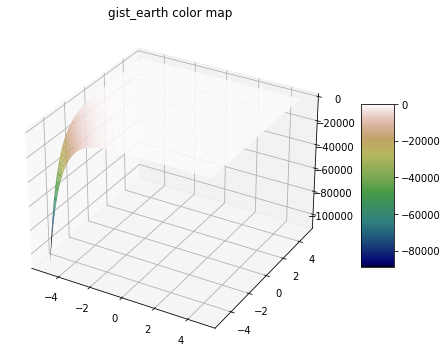

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')


x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X - Y)
print(np.shape(Z))


mycmap = plt.get_cmap('gist_earth')
ax1.set_title('gist_earth color map')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)


plt.show()